In [1]:
import numpy as np
import pandas as pd
from numpy import transpose as t
from numpy import matmul
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.metrics import zero_one_loss
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
class LinearDiscriminantAanlysis:
    def fit(self,x,y):
        self.unique,self.class_num= np.unique(y,return_counts=True)
        self.prior = []
        self.mu = []
        self.Sigma = 0
        for val in self.unique:
            self.prior.append(self.class_num[val]/len(y))
            ind = np.where(y==val)
            X = x[ind]
            self.mu.append(np.sum(X,axis=0)/len(X))
            self.Sigma += matmul(t(X-self.mu[val]),X-self.mu[val])
        self.Simga = np.array(self.Sigma)
        self.Sigma = self.Sigma/(len(x)-len(self.unique))
    def discriminant_function(self,x,prior,mu,Sigma):
        return matmul(x,matmul(inv(Sigma),t(mu)))-0.5*matmul(mu,matmul(inv(Sigma),t(mu)))+np.log(prior)
    def predict(self,x):
        c = []
        for i in x:
            result=[]
            for j in range(len(self.unique)):
                prior = self.prior[j]
                mu = self.mu[j]
                Sigma = self.Sigma
                result.append(self.discriminant_function(i,prior,mu,Sigma))
            c.append(result.index(max(result))) 
        return c
    def transformation(self,x):
        self.wc = self.Sigma*(len(x)-len(self.unique))
        total_mu = np.sum(x,axis=0)/len(x)
        self.bc = 0
        for i in range(len(self.unique)):
            n = self.class_num[i]
            self.bc += n*(np.outer((self.mu[i]-total_mu),(self.mu[i]-total_mu)))
        return self.wc, self.bc
    def fisherLDA(self,x,y,i):
        value,vector = LA.eig(matmul(inv(self.wc),self.bc))
        temp = pd.DataFrame(X)
        temp1 = pd.DataFrame(y)
        t = pd.concat([temp,temp1],axis=1)
        t.columns = ['x1','x2','y']
        plt.scatter(t['x1'],t['x2'],c=t['y'])
        x1 = np.linspace(min(X[:,0]),max(X[:,0]))
        for n,vec in enumerate(vector):
            if vector[n][0] ==0:
                plt.axvline(x=vector[0][0],label="eig"+str(n),c=np.random.rand(3,))
                plt.legend()
            else:
                inc = vector[n][1]/vector[n][0]
                plt.plot(x1,inc*(x1-vector[n][0])+vector[n][1],label="eig"+str(n),c=np.random.rand(3,))
                plt.legend()
        vec1 = np.array(vector[i]) #projection
        proj = matmul(np.outer(vec1,vec1),np.transpose(x))/(vec1.dot(vec1))
        plt.scatter(proj[0],proj[1])
        return proj
#[1,1] [vec[n][0],vec[n][1]] 

example

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0,0,0,1,1,1])

In [4]:
lda = LinearDiscriminantAanlysis()

In [5]:
lda.fit(X,y)

In [6]:
lda.transformation(X)

(array([[4.        , 2.        ],
        [2.        , 1.33333333]]),
 array([[24.        , 16.        ],
        [16.        , 10.66666667]]))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -2.,  1.,  1.,  2.]])

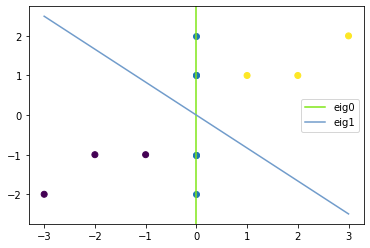

In [7]:
lda.fisherLDA(X,y,0)

array([[-0.09924301, -0.6901521 , -0.78939511,  0.09924301,  0.6901521 ,
         0.78939511],
       [ 0.08257517,  0.57424126,  0.65681643, -0.08257517, -0.57424126,
        -0.65681643]])

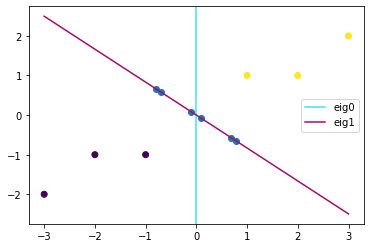

In [8]:
lda.fisherLDA(X,y,1)

example2

In [9]:
data = pd.read_csv("data/iris.csv")

In [10]:
np.unique(data['Species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
y = []
for i in data['Species']:
    if i == 'setosa':
        y.append(0)
    elif i == 'versicolor':
        y.append(1)
    else: y.append(2)

In [12]:
X = data.iloc[:,1:5]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
lda = LinearDiscriminantAanlysis()

In [16]:
lda.fit(X_train,y_train)

In [17]:
y_pred = lda.predict(X_test)

In [18]:
zero_one_loss(y_pred, y_test)

0.0